## Multiple Linear Regression

NOTATIONS

To denote different features we will denote x_1 x_2 etc. <br>
x subscript j will denote features <br>
n = number of features <br>
x superscript i will be a vector that includes all the features of ith training example i.e basically a row ..it is row vector...it is a list of vectors <br>
x subscript j superscript i means a particular value i.e single element <br>

### Model

Previously f(x) = wx + b.
Now,

`f(x) = w1x1 + w2x2 + w3x3 + w4x4 + ... + b`

w = [w1 w2 w3...]  #It is a row vector <br>
b is a number <br>
x = [x1 x2 x3 ...]  #It is list of features , row vectors <br>

`f(x) = w.x + b` <br>
Where there is dot product between w and x vectors here


### Vectorization

You're implementing a learning algorithm, using vectorization will both make your code shorter and also make it run much more efficiently. GPU hardware that stands for graphics processing unit. This is hardware objectively designed to speed up computer graphics in your computer, but turns out can be used when you write vectorized code to also help you execute your code much more quickly. 

In [5]:
import numpy as np 

In [6]:
w = np.array([1.0,2.5,-3.3])
b = 4
x = np.array([10,20,30])

In [7]:
#without vectorization implementation
f = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b
#but when n = 100 then very lengthy

In [8]:
#can also use loop but this is still without vectorization
#here basically all multiplications of w and x par summition is done and then at last b is added
f = 0
n = 3 #kitne features hai
for j in range(0,n): #means loop goes from 0 to n-1 or u can also write rang(n)
    f = f + w[j] * x[j]
f = f + b    

In [9]:
#with vectorization its done in single line by using the dot product from maths
f = np.dot(w,x) + b

Vectorization actually has two distinct benefits. First, it makes code shorter, is now just one line of code. Second, it also results in your code running much faster than either of the two previous implementations that did not use vectorization.

### What do computers do in background to run the vectorization code run faster 

In for loop if the range is 0 to 15 then it performes operations one after another. It at first timestamp calculates at index 0. f + w[0] * x[0]. The at second timestamp calculates the value at index 1 and so on till 15th step.In other words, it calculates these computations one step at a time, one step after another. <br>
In contrast, this function in NumPy is implemented in the computer hardware with vectorization. The computer can get all values of the vectors w and x, and in a single-step, it multiplies each pair of w and x with each other all at the same time in parallel. Then after that, the computer takes these 16 numbers and uses specialized hardware to add them altogether very efficiently, rather than needing to carry out distinct additions one after another to add up these 16 numbers. This means that codes with vectorization can perform calculations in much less time than codes without vectorization

When we will do gradient descent without vectorization, we have to multiply each derivative term with learning rate and find each w. <br>
w1 = w1 - 0.1*d1 <br>
w2 = w2 - 0.1*d2 <br>
...so on <br>
With Vectorization <br>
w = w - 0.1*d where w and d are vectors with arrows <br>
What it does....all values of w in parallel ...substracts 0.1 times all values of d from respective w and assign all 16 values in code in 1 step. <br>
`HENCE PARALLEL PROCESSING HARDWARE IS USED HERE`

## Python, NumPy, Vectorization

In [14]:
import numpy as np
import time

### Vectors

The elements of a vector are all the same type. The number of elements in the array is often referred to as the dimension though mathematicians may prefer rank. 

#### Vector Creation

In [17]:
a = np.zeros(4)
print(f"np.zeros(4), a = {a} shape = {a.shape} , data type = {a.dtype}")
a = np.zeros((4,))
print(f"np.zeros((4,)), a = {a} shape = {a.shape} , data type = {a.dtype}")
a = np.random.random_sample((4))
print(f"np.random.random_sample(4), a = {a} shape = {a.shape} , data type = {a.dtype}")

np.zeros(4), a = [0. 0. 0. 0.] shape = (4,) , data type = float64
np.zeros((4,)), a = [0. 0. 0. 0.] shape = (4,) , data type = float64
np.random.random_sample(4), a = [0.1679925  0.7289732  0.60115897 0.49925292] shape = (4,) , data type = float64


In [18]:
#these dont take shape as input
a = np.arange(4.) #4. gives floating values
print(f" {a} , {a.shape} , {a.dtype}")
a = np.random.rand(4)
print(a , a.shape, a.dtype)
#the only diff in rand and random_sample is in random_sample arg is tuple i.e ((4))

 [0. 1. 2. 3.] , (4,) , float64
[0.9849147  0.99861715 0.17869075 0.98629556] (4,) float64


In [19]:
a = np.array([5,4,3,2]);  print(f"np.array([5,4,3,2]):  a = {a},     a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2]); print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
#(4,) indicates 1d array with 4 elements

np.array([5,4,3,2]):  a = [5 4 3 2],     a shape = (4,), a data type = int32
np.array([5.,4,3,2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64


#### Operations on Vectors

##### Indexing

Indexing means referring to an element of an array by its position within the array.
Slicing means getting a subset of elements from an array based on their indices.

In [23]:
a = np.arange(10)
print(a)

print(f" {a[2].shape} {a[2]} accessing an element return scalar")
print(f"a[-1] = {a[-1]}")

try:
    c = a[10]
except Exception as e: #if any exception caught then assing it to e
    print("Error:")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
 () 2 accessing an element return scalar
a[-1] = 9
Error:
index 10 is out of bounds for axis 0 with size 10


##### Slicing

Slicing creates an array of indices using a set of three values(start:stop:step)

In [25]:
a = np.arange(10)
print(f"a         = {a}")

c = a[2:7:1]
print(c)

c = a[2:7:2]
print(c)

c = a[3:]
print(c)

c = a[:3]
print(c)

c = a[:]
print(c)

a         = [0 1 2 3 4 5 6 7 8 9]
[2 3 4 5 6]
[2 4 6]
[3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3 4 5 6 7 8 9]


##### Single vector operations

In [27]:
a = np.array([1,2,3,4])
print(f"a             : {a}")

b = -a 
print(f"b = -a        : {b}")

b = np.sum(a) 
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a): {b}")

b = a**2
print(f"b = a**2      : {b}")

a             : [1 2 3 4]
b = -a        : [-1 -2 -3 -4]
b = np.sum(a) : 10
b = np.mean(a): 2.5
b = a**2      : [ 1  4  9 16]


##### Vector Vector element-wise operations

In [29]:
a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Binary operators work element wise: [0 0 6 8]


In [30]:
#try a mismatched vector operation
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
operands could not be broadcast together with shapes (4,) (2,) 


##### Scalar Vector operations

Vectors can be 'scaled' by scalar values. A scalar value is just a number. The scalar multiplies all the elements of the vector.

In [32]:
a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a 
print(f"b = 5 * a : {b}")

b = 5 * a : [ 5 10 15 20]


##### Vector Vector dot product

The dot product multiplies the values in two vectors element-wise and then sums the result. Vector dot product requires the dimensions of the two vectors to be the same.

In [34]:
#using for loop first
def my_dot(a,b):
    x = 0
    for i in range(a.shape[0]):
        x = x +  a[i] * b[i]
    return x

In [35]:
#test 1D
a = np.array([1,2,3,4])
b = np.array([-1,4,3,2])
print (f"{my_dot(a,b)}")

24


In [36]:
#try using np.dot
a = np.array([1,2,3,4])
b = np.array([-1,4,3,2])
c = np.dot(a,b)
d = np.dot(b,a)
print(c)
print(d)

24
24


##### The Need for Speed: vector vs for loop

In [38]:
np.random.seed(1)
#Setting a seed ensures reproducibility — every time you run the code, it will produce the same sequence of random numbers.
a = np.random.rand(10000000) #very large arrays
b = np.random.rand(10000000)

tic = time.time()
c  = np.dot(a,b)
toc = time.time()

print(f"{c:.4f}")
print(f"{1000*(toc-tic):.4f}ms")

tic = time.time()
c = my_dot(a,b)
toc = time.time()

print(c)
print(f"{1000*(toc-tic):.4f}ms")

2501072.5817
27.1971ms
2501072.5816813707
5646.1115ms



So, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement the Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

##### Vector Vector operations in Course 1

In [41]:
# show common Course 1 example
X = np.array([[1],[2],[3],[4]])
w = np.array([2])
c = np.dot(X[1], w)

print(f"X[1] has shape {X[1].shape}")
print(f"X[1] has shape {X.shape}")
print(f"w has shape {w.shape} , {w}")
print(f"c has shape {c.shape} , {c}")

X[1] has shape (1,)
X[1] has shape (4, 1)
w has shape (1,) , [2]
c has shape () , 4


### Matrices

m = Number of rows <br>
n = Number of columns <br>
Course 1 does not do operations directly on matrices but typically extracts an example as a vector and operates on that. 

#### Creation

Notice how NumPy uses brackets to denote each dimension. Notice further than NumPy, when printing, will print one row per line.

In [45]:
a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.zeros((2, 1))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (2, 1), a = [[0.]
 [0.]]
a shape = (1, 1), a = [[0.44236513]]


In [46]:
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]
 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]


#### Operations

##### Indexing 


Matrices include a second index. The two indexes describe [row, column]. Access can either return an element or a row/column.

In [49]:
# -1 means you compute this dimension automatically, based on the size of the array and the other dimensions I provide.
# or we can say The -1 argument tells the routine to compute the number of rows given the size of the array and the number of columns.
a = np.arange(6).reshape(-1, 2)
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:   {a[2, 0].shape}, a[2,0] = {a[2, 0]},     type(a[2,0]) = {type(a[2, 0])} Accessing an element returns a scalar\n")

#access a row
print(f"a[2].shape:   {a[2].shape}, a[2]   = {a[2]}, type(a[2])   = {type(a[2])}")

a.shape: (3, 2), 
a= [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape:   (), a[2,0] = 4,     type(a[2,0]) = <class 'numpy.int32'> Accessing an element returns a scalar

a[2].shape:   (2,), a[2]   = [4 5], type(a[2])   = <class 'numpy.ndarray'>


##### Slicing 


In [51]:
#start : stop : step
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")

a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array
a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array
a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)
a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array
a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array


### Gradient Descent for multiple linear regression

You've learned about gradient descents about multiple linear regression and also vectorization. Let's put it all together to implement gradient descent for multiple linear regression with vectorization. <br>
Explained the gradient descent for multiple features. <br>
`AN ALTERNATIVE TO GRADIENT DESCENT` <br>
This method is called normal equation. Runs only for linear regression. This method is used to find w and b and doesnt need gradient descent. It turns out to be possible to use an advanced linear algebra library to just solve for w and b all in one goal without iterations. Slow when numbers of features is large. `If you're using a mature machine learning library and call linear regression, there is a chance that on the backend, it'll be using this to solve for w and b.`

### Implementing Multiple linear regression model

In [54]:
import copy,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("C:/Users/prish/Python/Machine_Learning/deeplearning.mplstyle")
np.set_printoptions(precision=2) #reduced display precision on numpy arrays
#Show only 2 digits after the decimal point for floating-point numbers.

In [55]:
# a non bold is scalar whereas bold is vector
# A is matrix
# m is number of training examples basically rows
# n is number of features in each example nasically columns

# our training dataset  has 4 features and 3 examples and size is in sqft and not 1000 sqft
X_train = np.array([[1204,5,1,45],[1416,3,2,40],[852,22,1,35]])
Y_train = np.array([460,232,178])

In [56]:
#data is stored in numpy array/matrix
print(f"X_shape: {X_train.shape}, X type:{type(X_train)}")
print(X_train)
print(f"Y_shape: {Y_train.shape}, Y type:{type(Y_train)}")
print(Y_train)

X_shape: (3, 4), X type:<class 'numpy.ndarray'>
[[1204    5    1   45]
 [1416    3    2   40]
 [ 852   22    1   35]]
Y_shape: (3,), Y type:<class 'numpy.ndarray'>
[460 232 178]


In [57]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# w and b will be loaded with some initial selected values that are near the optimal
print(f"w_init shape : {w_init.shape}, b_init type: {type(b_init)}")

w_init shape : (4,), b_init type: <class 'float'>


#### Single Prediction element by element

A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.

In [60]:
def predict_single_loop(x,w,b): #we are finding cost here
    '''
    Single predict using linear regression
    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model parameters    
        b (scalar):  model parameter
    Retuns:
        p(scalar) : prediction
    '''
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [61]:
#get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape : {x_vec.shape}, x_vec value: {x_vec}")

#make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f_wb)
#u cant apply .shape on float

x_vec shape : (4,), x_vec value: [1204    5    1   45]
107.79818261940818


#### Making use of Dot function to make our code smaller 

In [63]:
def predict(x,w,b):
    p = np.dot(x,w) + b
    return p

In [64]:
#now doing the prediction
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value : {x_vec}")

#make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f_wb.shape , f_wb)

x_vec shape (4,), x_vec value : [1204    5    1   45]
() 107.79818261940818


The results from both are same and going forward np.dot will be used for these operations. The prediction is now single statement.

#### Computing Cost with Multiple Variables

In [67]:
def compute_cost(x,y,w,b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """   
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        #yaha par x[i] gives a particular row with all features and x[i],w ka dot product is directly giving the answer of multiplying all features with their weights
        f_wb_i = np.dot(x[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost 

In [68]:
#compute and display cost using our pre-chosen optimal parameters
cost = compute_cost(X_train,Y_train,w_init,b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 44121.272705907795


#### Gradient with multiple variables

Here there is an outer loop over all m examples. dj_db for all examples can be computed directly. <br>
in second loop over all n features. dj_dw_j is computed for each w_j

In [70]:
def compute_gradient(x,y,w,b):
    '''
    Computes the gradient for linear regression
    Args:
        x: Data, m examples with n features
        y: Target values
        x: model parameters
        b: model parameter
    Returns:
    dj_dw and dj_db
    '''
    m,n = x.shape #number of examples and number of features
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [71]:
#compute and display gradient
tmp_dj_db,tmp_dj_dw = compute_gradient(X_train,Y_train,w_init,b_init)
print(tmp_dj_db)
print('\n' , tmp_dj_dw)

7.6245093927415155

 [-3.48e+04  2.16e+03  7.62e+00 -9.07e+02]


#### Gradient Descent with multiple Variables

In [73]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function, alpha, num_iters):
    '''
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    Returns:
        w : updated values of parameters
        b : updated value of paramter
        J_hist : cost value history
    '''
    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha *  dj_db

        if i<100000:
            J_hist.append(cost_function(x,y,w,b))

        if i%math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d} : Cost {J_hist[-1]:8.2f} ")

    return w,b,J_hist

In [74]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final,b_final,J_hist = gradient_descent(X_train, Y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)
print(f"b,w found : {b_final:0.2f},{w_final}")
m, _ = X_train.shape
for i in range(m):
    print(f'Prediction: {np.dot(X_train[i],w_final) + b_final:0.2f} , target value : {Y_train[i]}')

Iteration    0 : Cost 10788.03 
Iteration  100 : Cost  6877.80 
Iteration  200 : Cost  6866.15 
Iteration  300 : Cost  6854.52 
Iteration  400 : Cost  6842.92 
Iteration  500 : Cost  6831.35 
Iteration  600 : Cost  6819.81 
Iteration  700 : Cost  6808.30 
Iteration  800 : Cost  6796.81 
Iteration  900 : Cost  6785.36 
b,w found : 0.00,[ 0.24 -0.04 -0.02  0.24]
Prediction: 299.06 , target value : 460
Prediction: 348.68 , target value : 232
Prediction: 211.57 , target value : 178


Text(0.5, 0, 'iteration step')

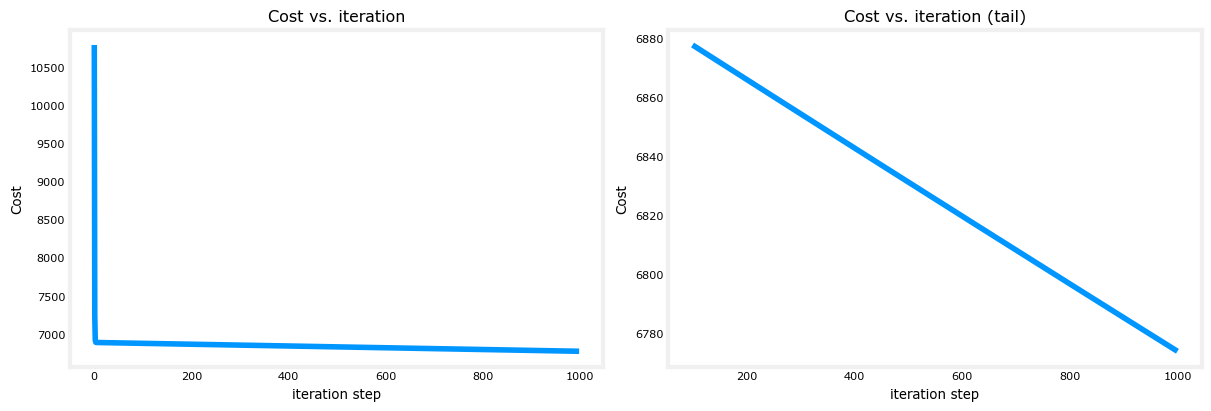

In [75]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

These results are not inspiring! Cost is still declining and our predictions are not very accurate. The next lab will explore how to improve on this.

### Feature Scaling 

You see a technique called feature scaling that will enable gradient descent to run much faster. Notice that when a possible range of values of a feature is large, like the size and square feet which goes all the way up to 2000. It's more likely that a good model will learn to choose a relatively small parameter value, like 0.1. Likewise, when the possible values of the feature are small, like the number of bedrooms, then a reasonable value for its parameters will be relatively large like 50.

In Scatter plot for features where size is on x axis and bedrooms on y axis, in that the points will lie mostly in lower part of graph above x since bedrooms ranges between 0-5 but it would be scattered all over the x axis since size range from 300-2000. <br>
The contours form ovals or ellipses and they're short on one side and longer on the other. And this is because a very small change to w1 can have a very large impact on the estimated price and that's a very large impact on the cost J. Because w1 tends to be multiplied by a very large number, the size and square feet. In contrast, it takes a much larger change in w2 in order to change the predictions much. And thus small changes to w2, don't change the cost function nearly as much.
![Contour Plot](Contour_plot.png)

Because the contours are so tall and skinny gradient descent may end up bouncing back and forth for a long time before it can finally find its way to the global minimum. In situations like this, a useful thing to do is to scale the features. This means performing some transformation of your training data so that x1 say might now range from 0 to 1 and x2 might also range from 0 to 1. So the data points now look more like this and you might notice that the scale of the plot on the bottom is now quite different than the one on top.
![Scatter_Plot](Scatter_Plot.png) <br>
Now the the contours will look more like more like circles and less tall and skinny. And gradient descent can find much more direct path to the global minimum.

So to recap, when you have different features that take on very different ranges of values, it can cause gradient descent to run slowly but re scaling the different features so they all take on comparable range of values. because speed, upgrade and dissent significantly. 

METHODS OF FEATURE SCALING

1. Dividing by maximum <br>
Suppose we have x1 ranges from 300 to 2000. Then one method to scale is to divide all original values by 2000 i.e maximum of range. And hence the range of x1 becomes now between 0.15 to 1. X2 ranges from 0 to 5 then u can have its scale version by dividing all values by maximum of range i.e 5. And it will now range from 0 to 1 <br>

2. Mean Normalization <br>
You start with the original features and then you re-scale them so that both of them are centered around zero. Whereas before they only had values greater than zero, now they have both negative and positive values that may be usually between negative one and plus one. <br>
Find mean of each feature. Then <br>
 ` x1 = (x1-mean)/(max-min)` <br>
Now x1 will range between -0.18 to 0.82. Similarly for x2. <br>

3. Z-score normalization
Find mean and sd for each feature. <br>
`x1 = (x1-mean)/sd` <br>

Mostly we try to bring the range between -1 to 1 but sometimes it is acceptable to have range between -3 to 3 or -0.3 to 0.3 or 0 to 3. Then its totally your wish whether to rescale it or not. But if the values range between very large like -100 to 100 or very small like -0.001 to 0.001 then u have rescale.

### Checking gradient descent for convergence

1. Learning curve<br>
What I'll often do is plot the cost function J, which is calculated on the training set, and I plot the value of J at each iteration of gradient descent. 
![Learning_Curve](Learning_curve.png) <br>
If gradient descent is working properly, then the cost J should decrease after every single iteration. If J ever increases after one iteration, that means either Alpha is chosen poorly, and it usually means Alpha is too large, or there could be a bug in the code. By 400 iterations, it looks like the curve has flattened out. This means that gradient descent has more or less converged because the curve is no longer decreasing. It turns out to be very difficult to tell in advance how many iterations gradient descent needs to converge, which is why you can create a graph like this, a learning curve.

2. Automatic convergence test <br>
Let's let epsilon be a variable representing a small number, such as 0.001 or 10^-3. If the cost J decreases by less than this number epsilon on one iteration, then you're likely on this flattened part of the curve that you see on the left and you can declare convergence.I usually find that choosing the right threshold epsilon is pretty difficult. 

### Choosing the learning rate

So if gradient descent isn't working, one thing I often do and I hope you find this tip useful too, one thing I'll often do is just set Alpha to be a very small number and see if that causes the cost to decrease on every iteration. If even with Alpha set to a very small number, J doesn't decrease on every single iteration, but instead sometimes increases, then that usually means there's a bug somewhere in the code. Take alpha 0.001 or then 0.01 then 0.1. For each iteration run a handful of iterations and plot the cost function. Plot the cost function J as a function of the number of iterations and after trying a few different values, you might then pick the value of Alpha that seems to decrease the learning rate rapidly, but also consistently. <br>
`After trying 0.001 , try 0.003 i.e increasing the rate by 3 folds. The 0.01 i.e again increasing the rate by 3 folds and so on.`

## Implementing feature-scaling and learning rate (Multi-variable)